### rotation curve from 21cm data and model

#### import matplotlib and numpy:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib ipympl
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

### Data: measured spectrum from: https://liv.oso.chalmers.se/salsa/
#### model and comparison data from: http://astroweb.case.edu/ssm/models/
#### NOTE: data text files must be in a folder named data
#### Use numpy to load each text file into 2 arrays: vel (velocity in km/s) and P (intensity in counts)

In [2]:
## model from (McGaugh, 2018, RNAAS, 2, 156)
Rm,Vbm,Vgm,Vkm,Vdm,Vm,Vcm = np.loadtxt("data/McGaugh_model.txt", skiprows=3, unpack = True)
## data from (McClure-Griffiths & Dickey, 2007, ApJ, 671, 427)
Rc,Vc = np.loadtxt("data/McClure07.txt", skiprows=3, unpack = True)
## our SALSA data (measured at edge of largest velocity)
glonM,V0M,V1M,V2M,V3M = np.loadtxt("data/Salsa_max.txt", unpack = True)
## our SALSA data (measured at highest peak in velocity)
glonP,V0P,V1P,V2P,V3P = np.loadtxt("data/Salsa_peaks.txt", unpack = True)

#### solar values (important to note which values were used)

In [5]:
vsun = 220  # km/s
rsun = 8.5  # kpc
##vsun = 233  # km/s (McGaugh)
##rsun = 8.12  # kpc (McGaugh)

vsinl = vsun * np.sin( glonM * np.pi / 180.)
rsinl = rsun * np.sin( glonM * np.pi / 180.)
rcosl = rsun * np.cos( glonM * np.pi / 180.)

#### estimate error and calculate rotational velocities

In [6]:
vread = 5 # km/s (error from reading by eye)

vrotM = V0M + vsinl  # edge of largest velocity
vrotP = V0P + vsinl  # highest peak in velocity

#### plot rotation curve

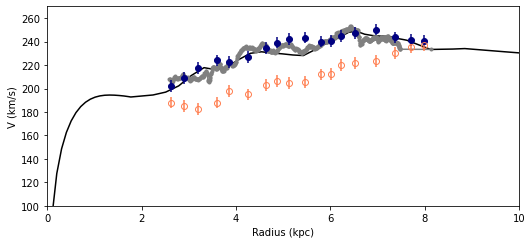

In [7]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r"Radius (kpc)")
ax1.set_ylabel(r"V (km/s)")
ax1.set_xlim(0, 10)
ax1.set_ylim(100, 270)
ax1.ticklabel_format(axis='x', style='plain')
ax1.plot(Rm,Vm, linestyle='-',color='k') ## total McGaugh model
ax1.plot(Rc,Vc, marker='o', markersize=3, color='grey') ## McClure data
ax1.errorbar(rsinl,vrotM, yerr=vread, fmt='o', color='navy')
ax1.errorbar(rsinl,vrotP, yerr=vread, fmt='o', fillstyle='none', color='coral')
plt.tight_layout()